In [59]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange,uniform
from sklearn.metrics import r2_score
from scipy import stats

In [60]:
os.chdir("/home/mosouwer/Downloads")

In [61]:
data=pd.read_csv("day.csv")

In [62]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [63]:
#data types of variable
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [64]:
#shape of the data
data.shape

(731, 16)

In [65]:
#columns
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [66]:
#unique value present in each variable
data.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [67]:
#Defining numeric and categorical variables and saving in specific array

num_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

cat_var = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# DATA PRE PROCESSING

### MISSING VALUE ANALYSIS

In [68]:
#sum of missing values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### No Missing Value Found

## Outliear Analysis

temp


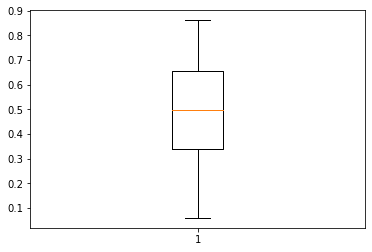

atemp


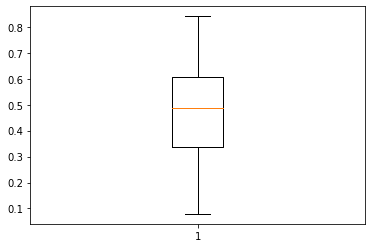

hum


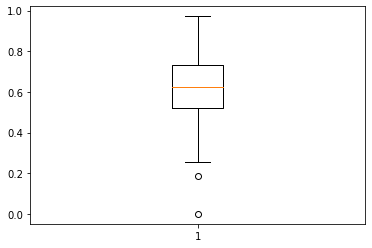

windspeed


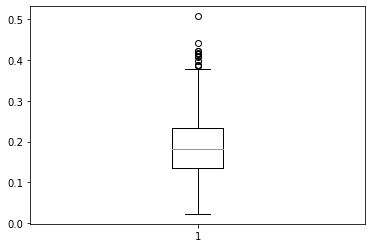

cnt


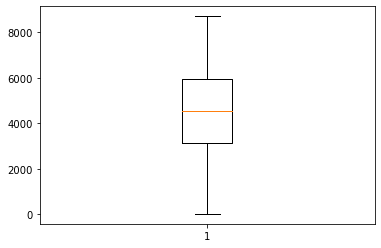

In [69]:
for i in num_var:
    print(i)
    plt.boxplot(data[i])
    plt.show()

### Outliears are found in humidity and windspeed variables

In [70]:
#calculate outliears
#calculate innerfence ,Outerfence and IQR

for i in num_var:
    print(i)
    q75, q25=np.percentile(data.loc[:,i],[75,25])
    iqr=q75-q25
    innerfence=q25 - (iqr*1.5)
    upperfence=q75 + (iqr*1.5)
    print("Innerfence : "+str(innerfence))
    print("upperfence : "+str(upperfence))
    print("IQR : ",str(iqr))
    
    
    
# replace outliers with NA

    data.loc[data[i]<innerfence, i] = np.nan
    data.loc[data[i]>upperfence, i] = np.nan    

temp
Innerfence : -0.14041600000000015
upperfence : 1.1329160000000003
IQR :  0.3183330000000001
atemp
Innerfence : -0.06829675000000018
upperfence : 1.0147412500000002
IQR :  0.2707595000000001
hum
Innerfence : 0.20468725
upperfence : 1.0455212500000002
IQR :  0.21020850000000002
windspeed
Innerfence : -0.012446750000000034
upperfence : 0.38061125
IQR :  0.0982645
cnt
Innerfence : -1054.0
upperfence : 10162.0
IQR :  2804.0


In [71]:
data.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
casual         0
registered     0
cnt            0
dtype: int64

#### 15 Outliears Found

In [72]:
#impute NA with median
data.hum=data.hum.fillna(data.hum.median())
data.windspeed=data.windspeed.fillna(data.windspeed.median())

In [73]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Data Analysis

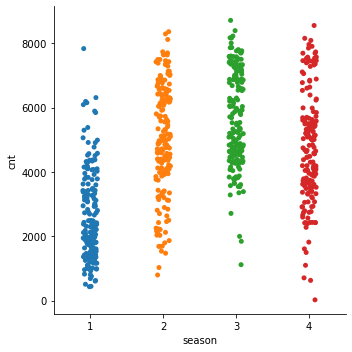

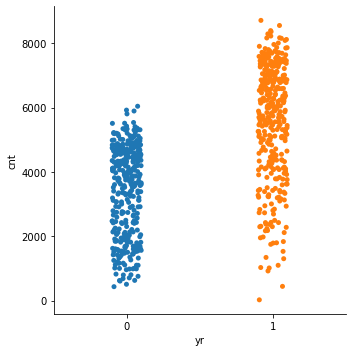

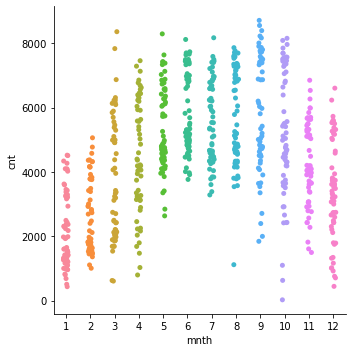

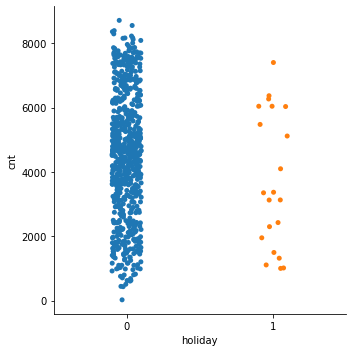

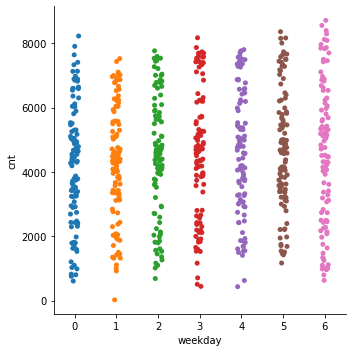

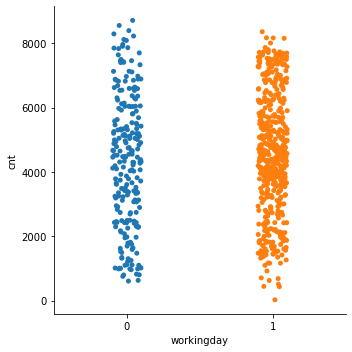

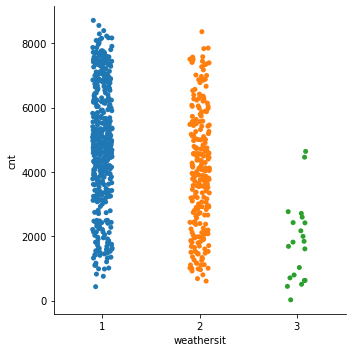

In [74]:
for i in cat_var:
    sns.catplot(x=i,y="cnt",data=data)

#### It is found that
#### In Season 2, 3 and 4 has the highest count
#### In Year 1 has high count than 0
#### In Months 4 to 10 has got pretty good count
#### On holidays the count is higher compared non-holidays
#### In weekdays, 0 and 6 has the highest count
#### In weather, 1 has the highest count

Text(0, 0.5, 'Bike Rental count')

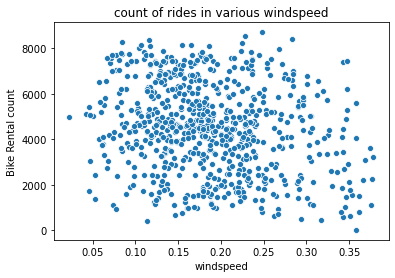

In [75]:
#count of rides in various windspeed

sns.scatterplot(x="windspeed",y="cnt",data=data)
plt.title("count of rides in various windspeed")
plt.ylabel("Bike Rental count")

Text(0, 0.5, 'Bike Rental count')

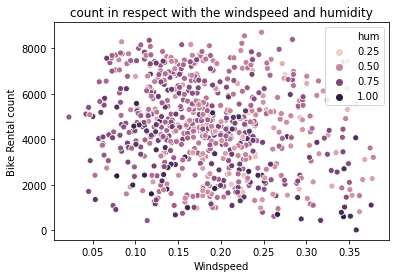

In [76]:
# count in respect with the windspeed and humidity

sns.scatterplot(x="windspeed",y="cnt",hue="hum",data=data)
plt.title("count in respect with the windspeed and humidity")
plt.xlabel("Windspeed")
plt.ylabel("Bike Rental count")

#### Count is high when windspeed is between 0.10 to 0.25 and humidity 0.50 to 0.75

Text(0, 0.5, 'Bike Rental count')

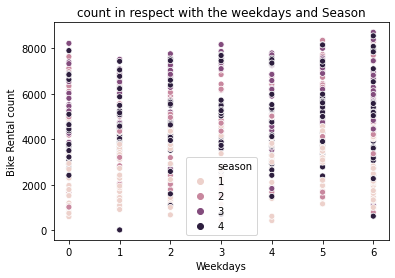

In [77]:
#count in respect with the weekdays and season

sns.scatterplot(x="weekday",y="cnt",hue="season",data=data)
plt.title("count in respect with the weekdays and Season")
plt.xlabel("Weekdays")
plt.ylabel("Bike Rental count")

#### Count is high in weekday 0 , 6 and season 4 has a highest count

Text(0, 0.5, 'Bike Rental count')

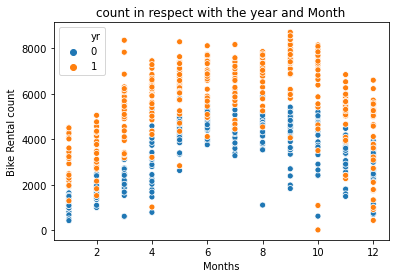

In [78]:
#count in respect with the year and month

sns.scatterplot(x="mnth",y="cnt",hue="yr",data=data)
plt.title("count in respect with the year and Month")
plt.xlabel("Months")
plt.ylabel("Bike Rental count")

#### count is high in year 1, particularly from season 3 to 12 excluding 9

# Feature Selection

In [79]:
# Correlation Analysis and Anova test to find varaibles which can be excluded

data_cor=data.loc[:,num_var]
print(data_cor.corr())

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991702  0.123723  -0.138937  0.627494
atemp      0.991702  1.000000  0.137312  -0.164157  0.631066
hum        0.123723  0.137312  1.000000  -0.200237 -0.121454
windspeed -0.138937 -0.164157 -0.200237   1.000000 -0.215203
cnt        0.627494  0.631066 -0.121454  -0.215203  1.000000


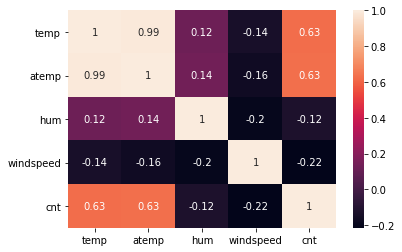

In [80]:
sns.heatmap(data_cor.corr(),annot=True)

### From the heatmap we can see temp and a temp are highly co-related with each other

In [81]:
# Anova Test for checking redundant categorical variable

import statsmodels.api as sm
from statsmodels.formula.api import ols

for i in cat_var:
    mod = ols('cnt' + '~' + i, data = data).fit()
    anova_table = sm.stats.anova_lm(mod, typ = 2)
    print(anova_table)

                sum_sq     df           F        PR(>F)
season    4.517974e+08    1.0  143.967653  2.133997e-30
Residual  2.287738e+09  729.0         NaN           NaN
                sum_sq     df           F        PR(>F)
yr        8.798289e+08    1.0  344.890586  2.483540e-63
Residual  1.859706e+09  729.0         NaN           NaN
                sum_sq     df          F        PR(>F)
mnth      2.147445e+08    1.0  62.004625  1.243112e-14
Residual  2.524791e+09  729.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.279749e+07    1.0  3.421441  0.064759
Residual  2.726738e+09  729.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.246109e+07    1.0  3.331091  0.068391
Residual  2.727074e+09  729.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  1.024604e+07    1.0  2.736742  0.098495
Residual    2.729289e+09  729.0       NaN       NaN
                  sum_sq     df          F 

### Holiday , Weekday and Workingday has the p-value >0.05 which means we will accept Null hypothesis

In [82]:
#Dimension Reduction

data = data.drop(['atemp', 'holiday', 'weekday', 'workingday'],axis=1)
print(data.shape)

(731, 12)


In [83]:
# variable "instant" can be dropped as it simply represents the index
# Variable "dteday" can be ignored as output is not based on time series analysis
# casual and registered variables can be removed, as these two sums to dependent variable count

data=data.drop(['instant','dteday','registered','casual'],axis=1)

In [84]:
data.head()

,season,yr,mnth,weathersit,temp,hum,windspeed,cnt
0,1,0,1,2,0.344167,0.805833,0.160446,985.0
1,1,0,1,2,0.363478,0.696087,0.248539,801.0
2,1,0,1,1,0.196364,0.437273,0.248309,1349.0
3,1,0,1,1,0.200000,0.590435,0.160296,1562.0
4,1,0,1,1,0.226957,0.436957,0.186900,1600.0


In [85]:
#updating var
num_var = ["temp","hum","windspeed","cnt"]   # numeric variables

cat_var = ["season", "yr", "mnth", "weathersit"]   # categorical variables

 ## Feature Scaling

temp


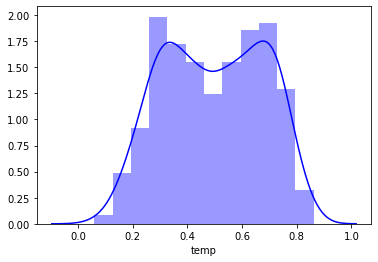

hum


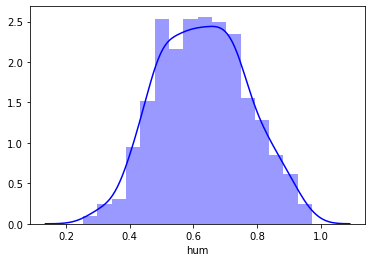

windspeed


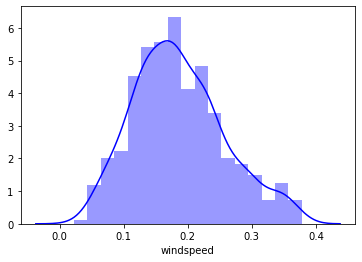

cnt


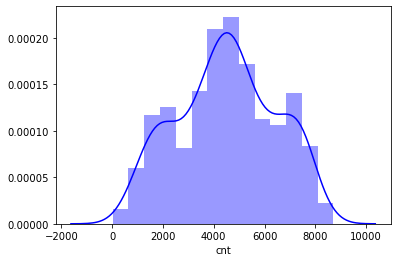

In [86]:
#check normality
for i in num_var:
    print(i)
    sns.distplot(data[i], bins = 'auto', color = 'blue')
    plt.show()

In [87]:
#check min max value for normalization
data.describe()

,season,yr,mnth,weathersit,temp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,1.395349,0.495385,0.629354,0.186257,4504.348837
std,1.110807,0.500342,3.451913,0.544894,0.183051,0.139566,0.071156,1937.211452
min,1.000000,0.000000,1.000000,1.000000,0.059130,0.254167,0.022392,22.000000
25%,2.000000,0.000000,4.000000,1.000000,0.337083,0.522291,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,1.000000,0.498333,0.627500,0.178802,4548.000000
75%,3.000000,1.000000,10.000000,2.000000,0.655417,0.730209,0.229786,5956.000000
max,4.000000,1.000000,12.000000,3.000000,0.861667,0.972500,0.378108,8714.000000


### data is normalized, No need of scaling

In [88]:
data = pd.get_dummies(data, columns = cat_var,drop_first=True) 

In [89]:
data.head()

,temp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,985.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.363478,0.696087,0.248539,801.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1349.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.200000,0.590435,0.160296,1562.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.226957,0.436957,0.186900,1600.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from scipy.stats.stats import pearsonr 

In [91]:
#predictors and trget var
X=data.drop('cnt',axis=1)
Y=data['cnt']

In [92]:
#devide the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [93]:
#define Error Metrics.

def MAPE(y_actual, y_predicted):
    MAPE = np.mean(np.abs(y_actual-y_predicted)/y_actual)*100
    return MAPE

def Rsquare(y_actual, y_predicted):
    Rsquare = np.corrcoef(y_actual,y_predicted)**2
    return Rsquare

## Desicion Tree

In [95]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=2).fit(X_train,Y_train)

In [96]:
#prediction
pred=dt.predict(X_test)

In [100]:
#Mean absolute percentage error
mape=MAPE(Y_test,pred)

In [105]:
#RSquare
rsquare=Rsquare(Y_test,pred)
rs_data = rsquare.ravel()
new_rscore = float(rs_data[1])

In [112]:
print("Mape: "+str(mape))
print("rsquare: "+str(new_rscore))
print("Accuracy: "+str(100-mape))

Mape: 36.94809301452646
rsquare: 0.6544606873373328
Accuracy: 63.05190698547354


## Random Forest

In [125]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100).fit(X_train,Y_train)

In [127]:
#prediction

rf_pred=rf.predict(X_test)

In [128]:
#Mean absolute percentage error
mape=MAPE(Y_test,rf_pred)

In [130]:
#RSquare
rsquare=Rsquare(Y_test,rf_pred)
rs_data = rsquare.ravel()
new_rscore = float(rs_data[1])

In [131]:
print("Mape: "+str(mape))
print("rsquare: "+str(new_rscore))
print("Accuracy: "+str(100-mape))

Mape: 21.586269848650655
rsquare: 0.8783496338171791
Accuracy: 78.41373015134934


## LINEAR REGRESSION MODEL

In [118]:
import statsmodels.api as sm
lr= sm.OLS(Y_train, X_train).fit()
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              991.4
Date:                Sat, 13 Mar 2021   Prob (F-statistic):                        0.00
Time:                        15:48:44   Log-Likelihood:                         -4741.0
No. Observations:                 584   AIC:                                      9522.
Df Residuals:                     564   BIC:                                      9609.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [119]:
#Prediction

lr_pred = lr.predict(X_test)

In [120]:
#Mean absolute percentage error
mape=MAPE(Y_test,lr_pred)

In [121]:
#RSquare
rsquare=Rsquare(Y_test,lr_pred)
rs_data = rsquare.ravel()
new_rscore = float(rs_data[1])

In [140]:
print("Mape: "+str(mape))
print("rsquare: "+str(new_rscore))
print("Accuracy: "+str(100-mape))

Mape: 21.586269848650655
rsquare: 0.8783496338171791
Accuracy: 78.41373015134934


In [144]:
#Sample Input
LRModel.predict([[0.5, 0.6, 0.7,2,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1]])

array([2859.92368684])

#### Putting all the variables humidity, weather, temperature , season, month and year, is found that for those particular input we got above result